In [1]:
import numpy as np

# Intialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

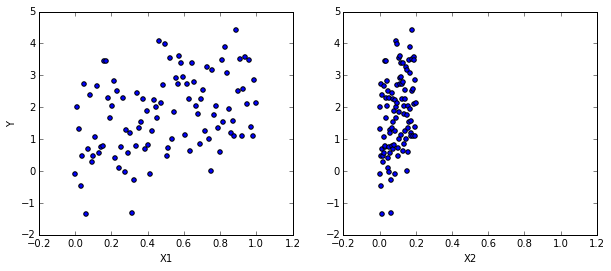

In [8]:
%matplotlib inline 
import pylab as pl

fig, axes = pl.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [30]:
from pymc3 import Model, Normal, HalfNormal

In [32]:
def debug_top_level():

    basic_model = Model()

    with basic_model:

        # Priors for unknown model parameters
        alpha = Normal('alpha', mu=0, sd=10)
        beta = Normal('beta', mu=0, sd=10, shape=2)
        sigma = HalfNormal('sigma', sd=1)

        # Expected value of outcome
        mu = alpha + beta[0]*X1 + beta[1]*X2

        # Likelihood (sampling distribution) of observations
        Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [37]:
%debug
import pdb
pdb.run('debug_top_level()')

> /Users/Arya/anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/kernelbase.py(681)_input_request()
    680                 # re-raise KeyboardInterrupt, to truncate traceback
--> 681                 raise KeyboardInterrupt
    682             else:

ipdb> step
> <string>(1)<module>()->None
(Pdb) step
--Call--
> <ipython-input-32-008fc22ddf73>(1)debug_top_level()
-> def debug_top_level():
(Pdb) step
> <ipython-input-32-008fc22ddf73>(3)debug_top_level()
-> basic_model = Model()
(Pdb) step
--Call--
> /ProgramData/Anaconda2/Lib/site-packages/pymc3/model.py(87)__init__()
-> def __init__(self):
(Pdb) step
> /ProgramData/Anaconda2/Lib/site-packages/pymc3/model.py(88)__init__()
-> self.named_vars = {}
(Pdb) step
> /ProgramData/Anaconda2/Lib/site-packages/pymc3/model.py(89)__init__()
-> self.free_RVs = []
(Pdb) step
> /ProgramData/Anaconda2/Lib/site-packages/pymc3/model.py(90)__init__()
-> self.observed_RVs = []
(Pdb) step
> /ProgramData/Anaconda2/Lib/site-packages/pymc3/model.py(91)__ini

In [28]:
from scipy import optimize
from pymc3 import find_MAP, NUTS, sample

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = NUTS(scaling=start)

    # draw 500 posterior samples
    trace = sample(500, step, start=start)

 [-----------------100%-----------------] 500 of 500 complete in 1.3 sec

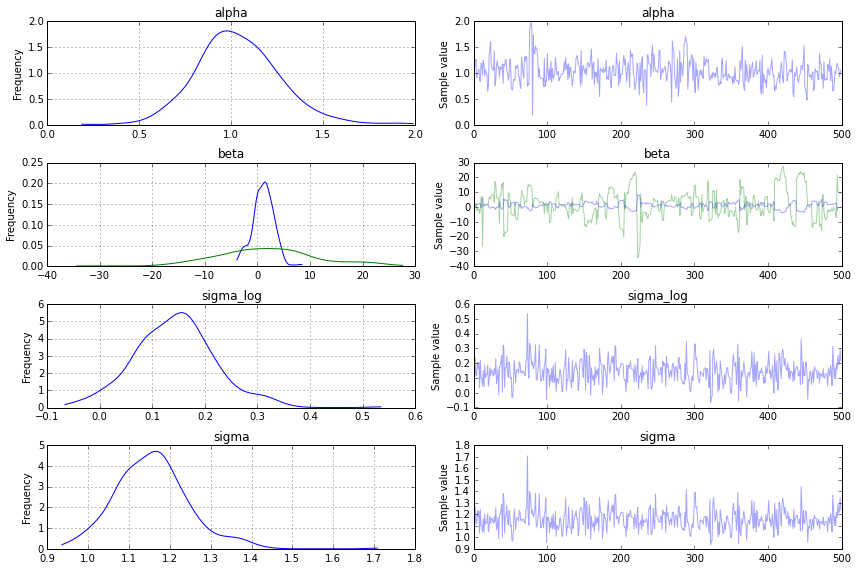

In [29]:
from pymc3 import traceplot

traceplot(trace);

In [4]:
%load_ext rpy2.ipython

In [ ]:
%%R -i Y
